![img](https://github.com/MEmilyGomes/PCD---Criptografia-RSA/assets/172424897/8ab16e3d-9b90-4e14-b4ae-af54178c31fd) 


# <center>Temperatura crítica de materiais supercondutores: aprendizado de máquina</center> 
#### <center>Trabalho Final de Machine Learning - Ilum: Escola de Ciências, Campinas, 2024<center>

___________________

__Autor:__ Andriel Vinícius Martins Silva | andriel24044@ilum.cnpem.br
<br>
__Autor:__ Pedro Coelho Gimenes de Freitas | pedro24033@ilum.cnpem.br
<br>
__Autor:__ Rafael Dalacorte Erdmann | rafael24017@ilum.cnpem.br

____________________

# Sumário

* [I. Introdução](#introducao)
    * [I.I - Dataset](#dataset)
* [II. Modelos](#modelos)
    * [II.I - Modelo BaseLine](#baseline)
    * [II.II - Modelos Lineares (LinearRegression e BayesianRidge)](#lineares)
    * [II.III - Modelo dos $k$-vizinhos mais próximos ($k$-NN)](#knn)
    * [II.IV - Modelo de Floresta Aleatória](#floresta)
* [III. Conclusões](#conclusao)
* [IV. Referências](#referencias)


____________________

# <div id="introducao"> I. Introdução

<p style="text-align: justify;">
    Neste caderno, trabalharemos com o outro dataset do <i>Superconductivity</i>, isto é, o arquivo secundário <code>unique-m.csv</code> com a composição de cada supercondutor (escrita por extenso na coluna <code>material</code> e com uma coluna de contagem para a proporção de cada um dos 86 elementos). Treinaremos os mesmos modelos e analisaremos as performances dos modelos, a fim de observar as possíveis alterações nas métricas, a partir de dados diferentes.
</p>


<div style="text-align: justify;">
    <div class="alert alert-danger">
        <b>Obs: </b>Este arquivo serve como suporte para o teste de um novo dataset. Para garantir que você compreenda plenamente as informações e análises apresentadas aqui, <b>recomendamos fortemente</b> que você leia o arquivo principal antes de prosseguir. Essa abordagem permitirá que você tenha uma visão mais completa e contextualizada do conteúdo, facilitando a compreensão dos resultados e suas implicações. Agradecemos pela sua atenção, aproveite sua leitura!
    </div>
</div>


## <div id="dataset"> I.I - Dataset

<p style="text-align:justify;">Neste dataset, não é possível importá-lo com a biblioteca <code>UCIMLRepo</code>. Dessa forma, é necessário que você tenha os dados baixados em seu computador. Para isso, faça o download neste <a href="https://archive.ics.uci.edu/static/public/464/superconductivty+data.zip">link</a>.


<p style="text-align: justify;">
    Com o dataset armazenado localmente, iremos importá-lo com a biblioteca <code>Pandas</code> e retiraremos a temperatura crítica e os materiais do eixo X, a fim de se ter apenas as features armazenadas nesta variável. Por fim, define-se o target como a temperatura crítica.
</p>

In [1]:
import pandas as pd

superconductivty_chem = pd.read_csv("unique_m.csv")

X = superconductivty_chem.drop(["critical_temp", "material"], axis=1)
y = superconductivty_chem["critical_temp"]

In [2]:
X

,H,He,Li,Be,B,C,N,O,F,Ne,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


<p style="text-align: justify;">
    Note que seria incorreto realizar o VIF neste dataset, uma vez que não há colinearidade entre a proporção dos materiais. Nesse sentido, um processo de seleção de atributos possa fazer com que o algoritmo encontre, de maneira errônea, relações entre alguns atributos, o que pode levar a conclusões errôneas sobre a importância de certas variáveis.
</p>


<p style="text-align:justify;">Agora, é necessário separar os atributos e targets em dados de teste (<code>x_teste</code> e <code>y_teste</code>) e de treino (<code>X_treino</code> e <code>y_treino</code>). Para isso, será utilizado o módulo <code>TrainSplitTest</code> do <code>Scikit-Learn</code>.

In [17]:
from sklearn.model_selection  import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=6969)

____________________

# <div id="modelos"> II. Modelos

<p style="text-align:justify;">Com os dados, utilizaremos alguns modelos de aprendizagem de máquina para encontrar uma solução à problemática.

## <div id="baseline"> II.I - Modelo BaseLine

<p style="text-align:justify;">Como referência, utilizaremos um modelo Baseline da média dos dados. Isso é, para qualquer entrada de atributo, o modelo retorna a média de todos os dados. Assim, obtemos um RMSE que nos informará se os modelos seguintes apresentam utilidade (afinal, não queremos nenhuma predição pior que retornar a média).

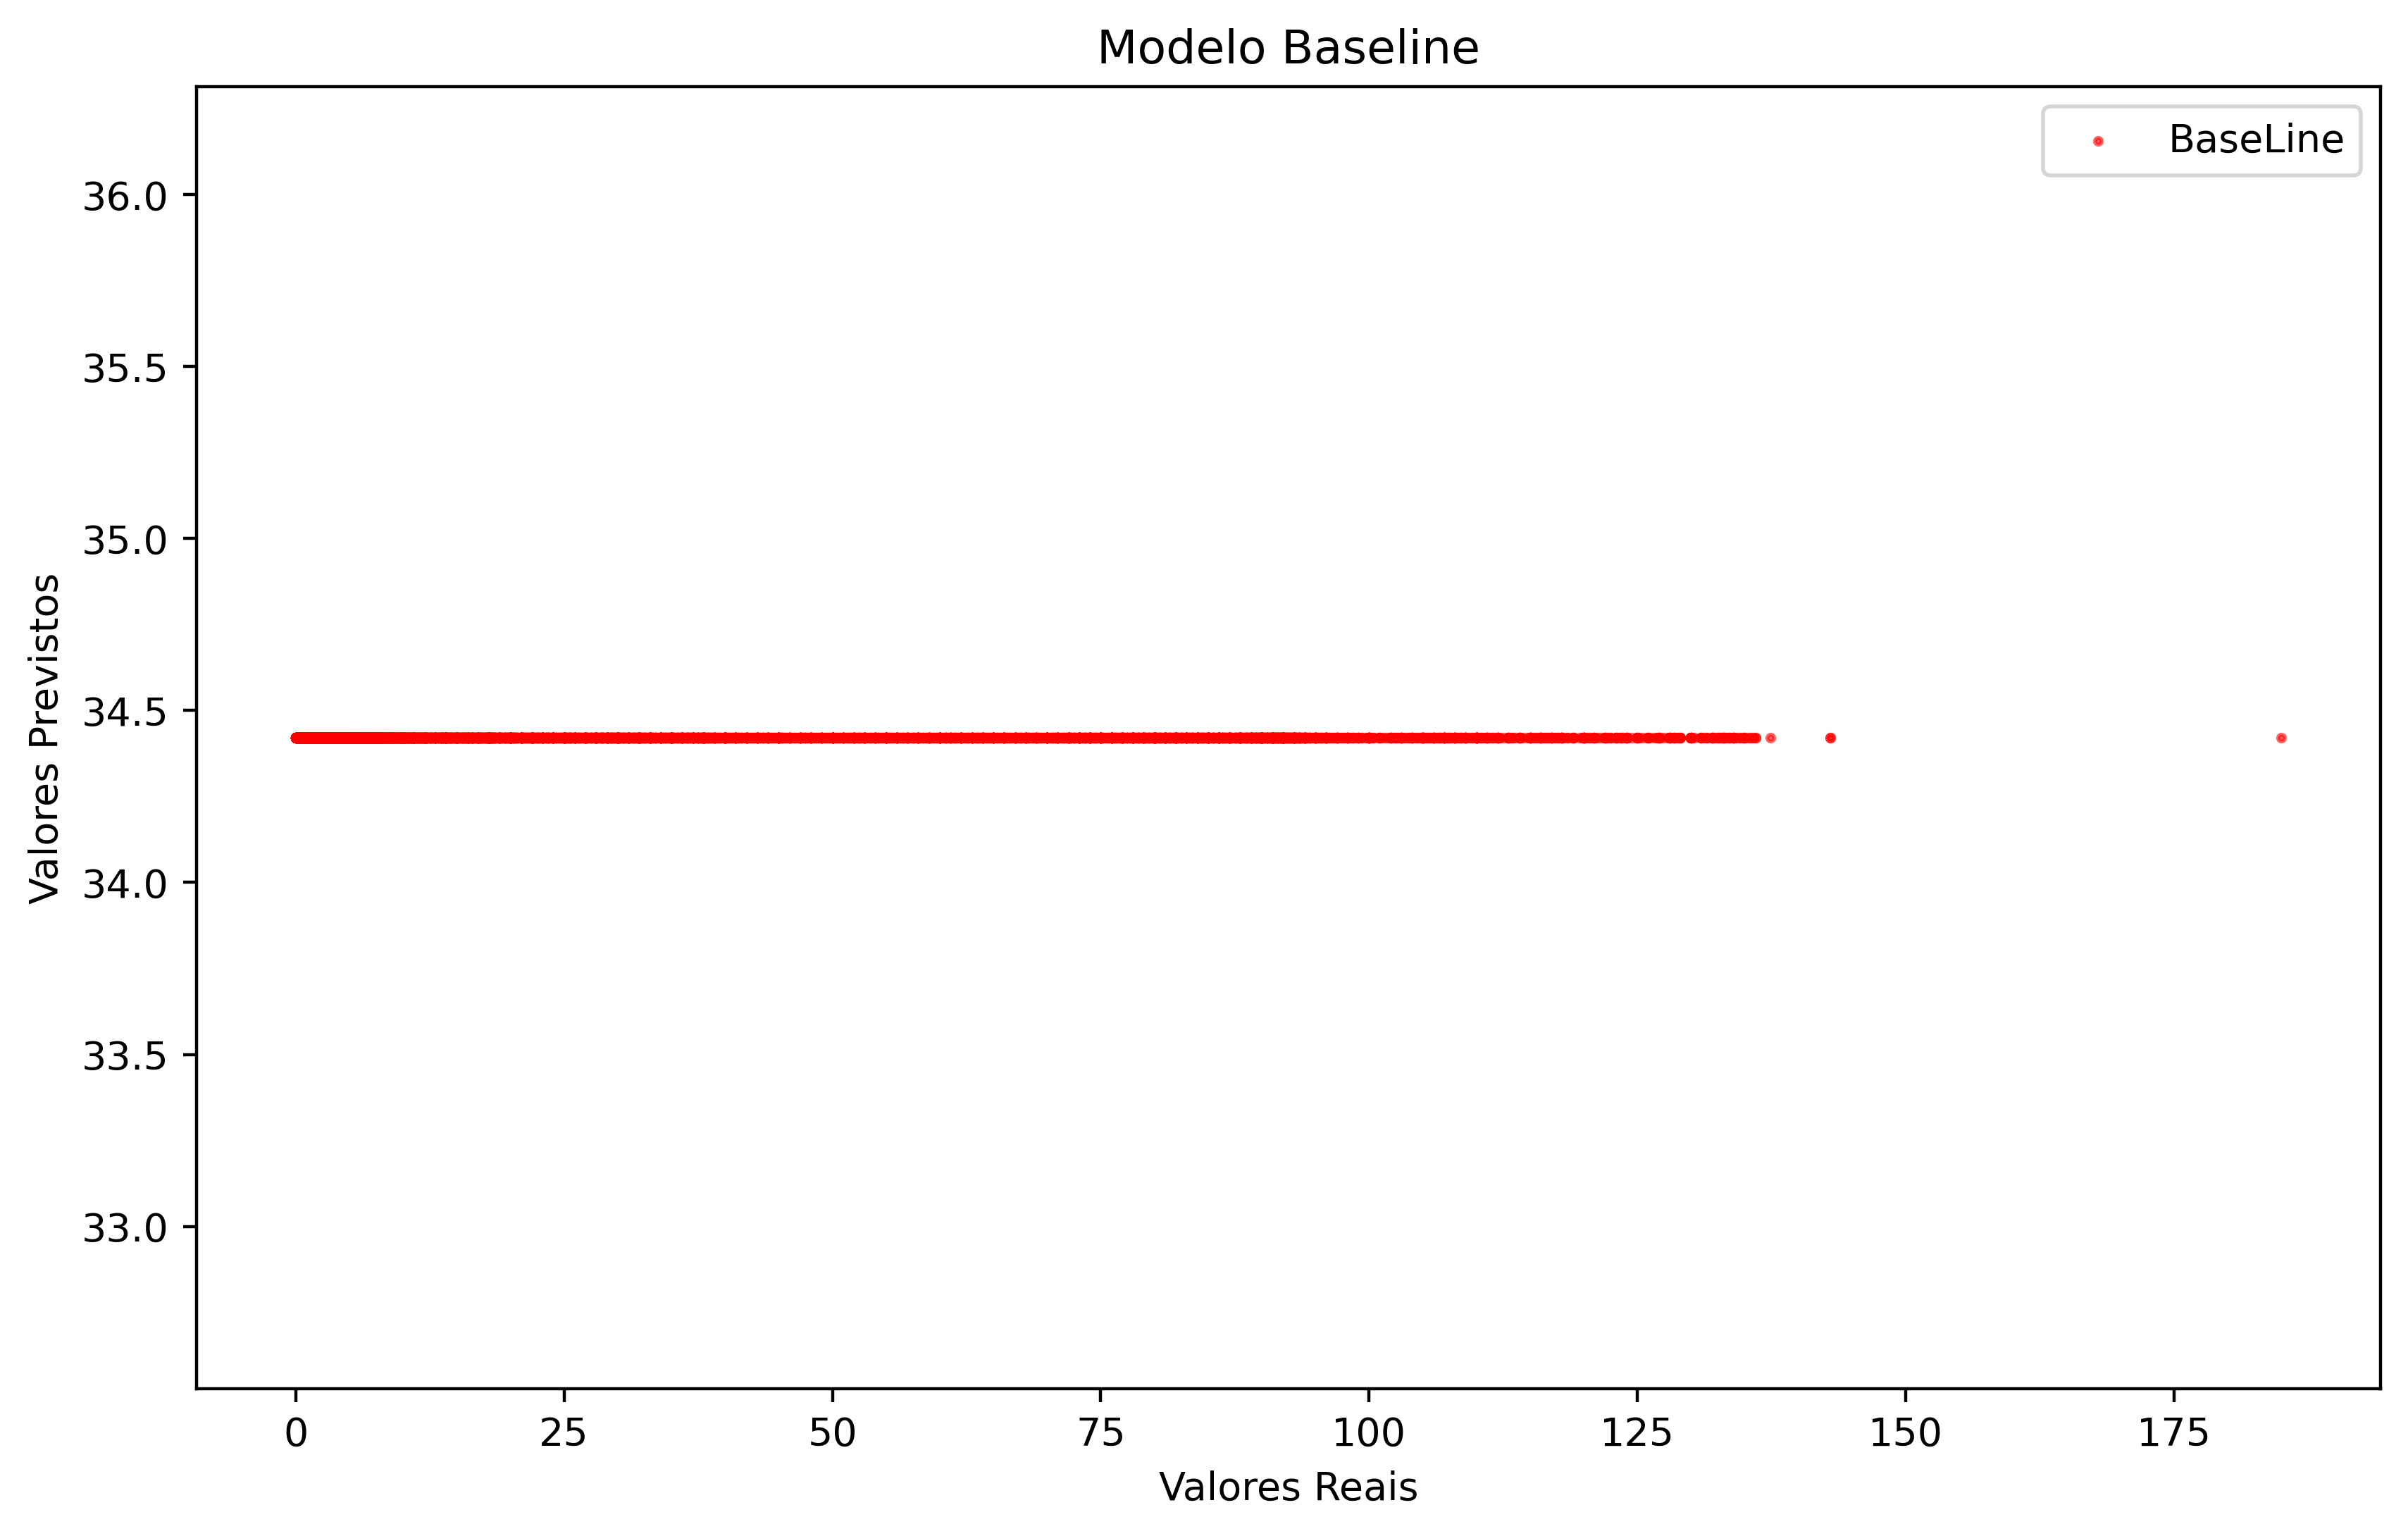

In [4]:
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X,y)

y_baseline = dummy_regr.predict(X)

y_baseline

plt.figure(figsize=(10, 6), dpi=400)

t = plt.scatter(x=y.values.ravel(), y=y_baseline, color='red', label='BaseLine', alpha=0.6,s=3)

plt.title('Modelo Baseline')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error

RMSE_baseline = mean_squared_error(y, y_baseline, squared=False)

print(f'O RMSE do modelo baseline é de {RMSE_baseline} K')

O RMSE do modelo baseline é de 34.25355694704622 K


## <div id="lineares"> II.II - Modelos Lineares (LinearRegression e BayesianRidge)

<p style="text-align:justify;"> Os códigos das funções foram adaptados do material de aula do professor Dr. Daniel R. Cassar <sup><a href="#ref-7">[7]</a></sup>, os algoritmos de aprendizado de máquina utilizou-se <code>Scikit-Learn</code><sup><a href="#ref-8">[8]</a></sup>, para plotar os gráficos utilizou-se <code>Matplotlib</code><sup><a href="#ref-9">[9]</a></sup>.

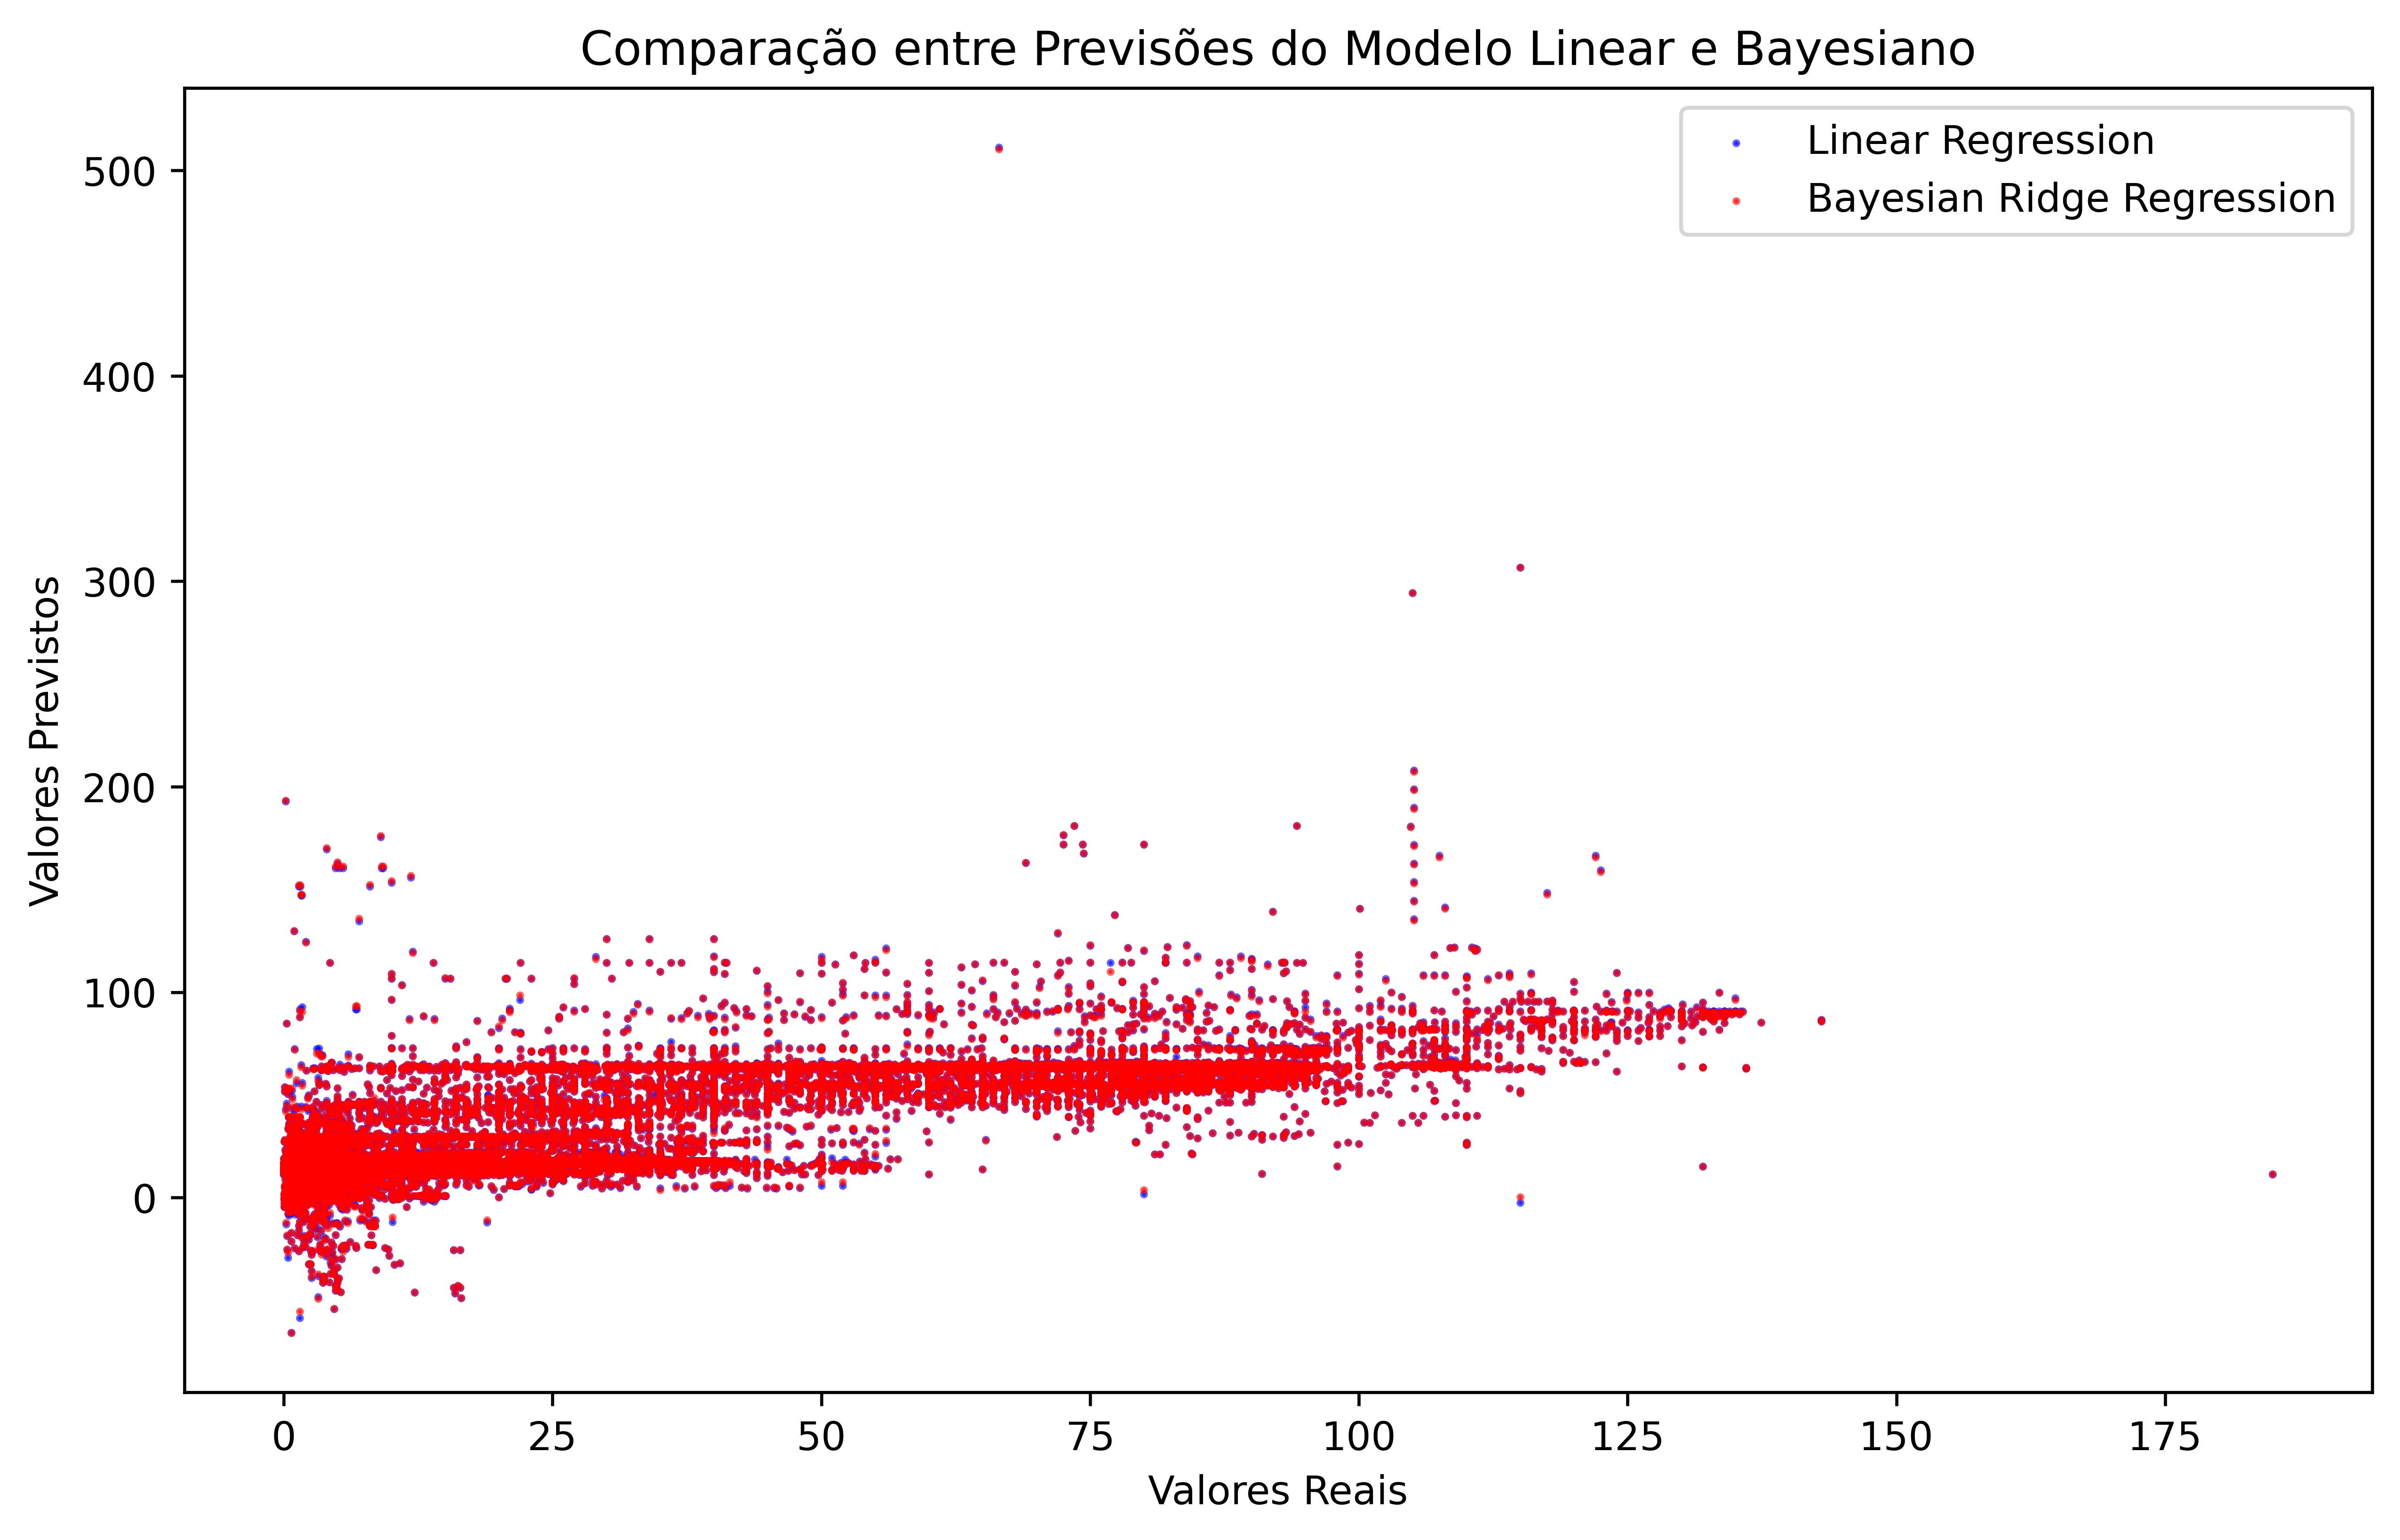

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression

modelo_linear = LinearRegression()
modelo_bayesian = BayesianRidge()

modelo_linear.fit(X_treino, y_treino)
modelo_bayesian.fit(X_treino, y_treino)

y_previsto_bayesian = modelo_bayesian.predict(X_treino)
y_previsto_linear = modelo_linear.predict(X_treino)

plt.figure(figsize=(10, 6), dpi=600)

plt.scatter(y_treino, y_previsto_linear, color='blue', label='Linear Regression', alpha=0.6,s=1)

plt.scatter(y_treino, y_previsto_bayesian, color='red', label='Bayesian Ridge Regression', alpha=0.6,s=1)

plt.title('Comparação entre Previsões do Modelo Linear e Bayesiano')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.show()

<p style="text-align:justify;">Deste gráfico, podemos observar visualmente como as previsões são levemente diferentes, apesar de serem próximas.

<p style="text-align:justify;">Por fim, iremos analisar os resultados obtidos a partir da métrica RMSE (Erro Quadrático Médio) para o modelo linear tradicional e o modelo bayesiano.


In [7]:
from sklearn.metrics import mean_squared_error

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_linear.predict(X_verdadeiro)

RMSE_linear = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo linear foi de {RMSE_linear:0.4f} K")

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_bayesian.predict(X_verdadeiro)

RMSE_bayesiano = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo bayesiano foi de {RMSE_bayesiano:0.4f} K")

O RMSE do modelo linear foi de 22.0200 K
O RMSE do modelo bayesiano foi de 22.0058 K


## <div id="knn"> II.III - Modelo dos $k$-vizinhos mais próximos ($k$-NN)

<p style="text-align:justify;"> Para evitar calcular cada regressor com os possíveis números de vizinhos próximos, utilizaremos a biblioteca <code>Optuna</code><sup><a href="#ref-10">[10]</a></sup>, que facilita o mapeamento de hiperparâmetros através de buscas bayesianas mais inteligentes. No geral essa biblioteca é útil quando tratando de mais de um hiperparâmetro ao mesmo tempo, mas aqui iremos focar apenas no número de vizinhos.

In [8]:
from sklearn.neighbors import KNeighborsRegressor


def cria_instancia_knn(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.

    """
    parametros = {
        "n_neighbors": trial.suggest_int("num_vizinhos", 1, 100),
        "n_jobs": -1,
    }

    model = KNeighborsRegressor(**parametros)

    return model

from sklearn.model_selection import cross_val_score

def funcao_objetivo_knn(trial, X, y, num_folds):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451

    """
    modelo = cria_instancia_knn(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    #retorno negativo pelo comportamento padrão do scikit-learn em considerar a maior métrica como a melhor métrica
    return -metricas.mean()

In [9]:
"""Caso necessário, a biblioteca Optuna pode ser instalada pela linha abaixo"""
#!pip install optuna

from optuna import create_study

NOME_DO_ESTUDO = "knn-superconduct-unique-m"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-10-20 23:54:48,789] Using an existing study with name 'knn-superconduct-unique-m' instead of creating a new one.


O Optuna fará 100 tentativas para encontrar os melhores hiperparâmetros. O método `optimize` executa a função objetivo e ajusta o modelo de acordo com as tentativas. 

O arquivo gerado por meio do optuna encontra-se disponível para download em: [optuna KNN](https://github.com/Andriel24044/SuperCondutividade-ML/blob/main/Otimiza%C3%A7%C3%A3o%20de%20Hiperpar%C3%A2metros/Segundo%20Dataset/knn-superconduct-unique-m.db)

Após a otimização, recuperamos o melhor conjunto de parâmetros com `best_trial`.

In [10]:
NUM_FOLDS = 10

def funcao_objetivo_parcial(trial):
    return funcao_objetivo_knn(trial, X_treino, y_treino, NUM_FOLDS)

NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

df = objeto_de_estudo.trials_dataframe()
df = df.dropna()

df

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
[I 2024-10-20 23:54:54,994] Trial 102 finished with value: 10.855867085932037 and parameters: {'num_vizinhos': 6}. Best is trial 101 with value: 10.419844663595686.


,number,value,datetime_start,datetime_complete,duration,params_num_vizinhos,state
0,0,14.887434,2024-10-19 16:13:50.555407,2024-10-19 16:14:02.028827,0 days 00:00:11.473420,100,COMPLETE
1,1,12.595959,2024-10-19 16:14:02.241728,2024-10-19 16:14:14.241810,0 days 00:00:12.000082,22,COMPLETE
2,2,13.299832,2024-10-19 16:14:14.259585,2024-10-19 16:14:25.146131,0 days 00:00:10.886546,36,COMPLETE
3,3,13.494509,2024-10-19 16:14:25.165553,2024-10-19 16:14:36.818750,0 days 00:00:11.653197,41,COMPLETE
4,4,12.666215,2024-10-19 16:14:36.854788,2024-10-19 16:14:47.393574,0 days 00:00:10.538786,23,COMPLETE
...,...,...,...,...,...,...,...
98,98,10.982397,2024-10-19 16:31:59.517104,2024-10-19 16:32:11.920937,0 days 00:00:12.403833,7,COMPLETE
99,99,11.702608,2024-10-19 16:32:11.992680,2024-10-19 16:32:24.409745,0 days 00:00:12.417065,1,COMPLETE
100,100,11.601269,2024-10-20 11:01:13.285039,2024-10-20 11:01:14.691174,0 days 00:00:01.406135,12,COMPLETE
101,101,10.419845,2024-10-20 23:49:00.821399,2024-10-20 23:49:06.696754,0 days 00:00:05.875355,3,COMPLETE


In [11]:
melhores_vizinhos = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhores_vizinhos.number}")
print(f"Número de vizinhos do melhor trial: {melhores_vizinhos.params}")

Número do melhor trial: 101
Número de vizinhos do melhor trial: {'num_vizinhos': 3}


<p style="text-align:justify;"> Podemos analisar os resultados obtidos pela análise do optuna graficamente pelo código simples abaixo.

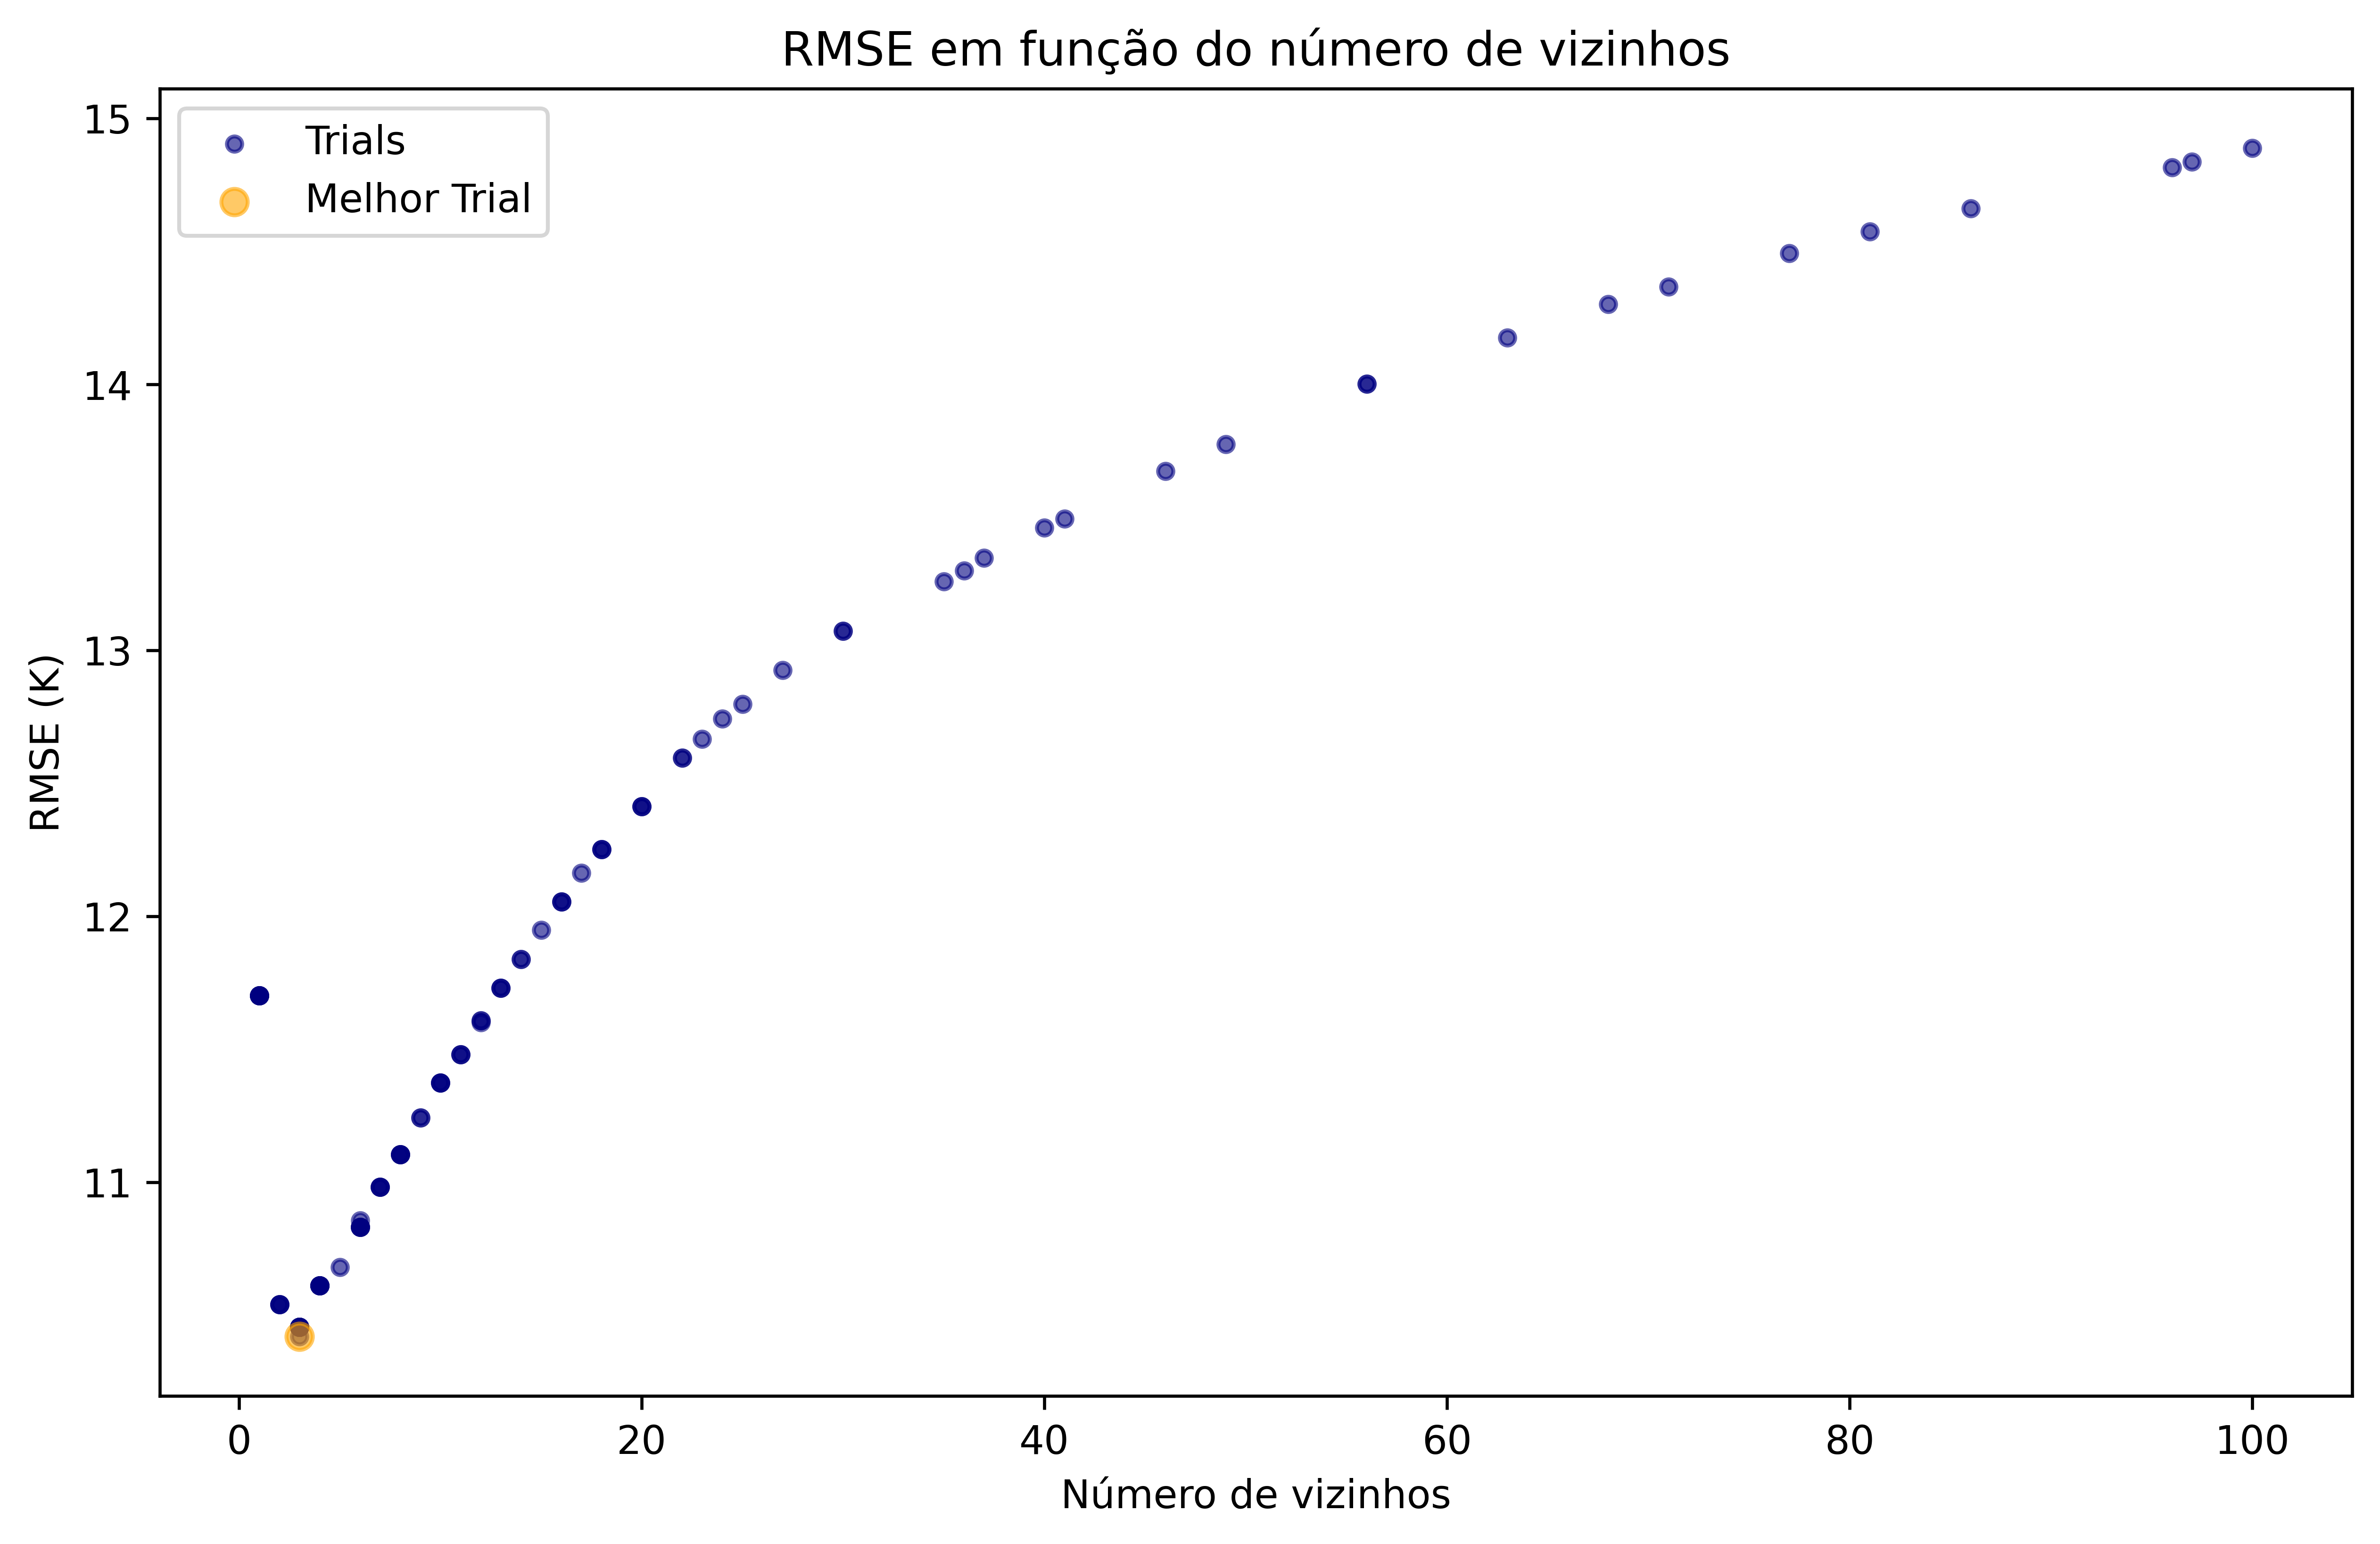

In [12]:
plt.figure(figsize=(10, 6), dpi=600)

plt.scatter(x = df["params_num_vizinhos"], y = df["value"], color='navy', label='Trials', alpha=0.6,s=15)
plt.scatter(x = melhores_vizinhos.params['num_vizinhos'], y = melhores_vizinhos.value, color='orange', label='Melhor Trial', alpha=0.6,s=45)

plt.title('RMSE em função do número de vizinhos')
plt.xlabel('Número de vizinhos')
plt.ylabel('RMSE (K)')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

rmse_previsto = list()
modelo_knn = KNeighborsRegressor(n_neighbors=2)

modelo_knn.fit(X_treino, y_treino)
y_previsto = modelo_knn.predict(X_teste)

RMSE_knn = mean_squared_error(y_teste, y_previsto) ** (1/2)

print(f'O valor do RMSE para o modelo de k-NN foi de, aproximadamente, {RMSE_knn:0.4f} K')

O valor do RMSE para o modelo de k-NN foi de, aproximadamente, 10.5926 K


## <div id="floresta"> II.IV - Modelo de Floresta Aleatória

A função `cria_instancia_floresta` ajusta os hiperparâmetros do modelo com o **Optuna**, como o número de árvores e o critério de divisão, buscando equilibrar desempenho e generalização. A função `funcao_objetivo_floresta` aplica validação cruzada com 10 folds, e o **RMSE** negativo é usado como métrica, já que o objetivo é minimizar o erro.

O estudo é criado e armazenado em um banco de dados SQLite, permitindo reuso dos resultados, com `random_state` fixo para garantir reprodutibilidade.

In [14]:
from sklearn.ensemble import RandomForestRegressor

def cria_instancia_floresta(trial):
    parametros = {
        
        "n_estimators": trial.suggest_int("num_arvores", 10, 100),
        "criterion": trial.suggest_categorical(
            "critério", ["squared_error", "friedman_mse", "poisson"]
        ),
        "min_samples_split": trial.suggest_int(
            "min_exemplos_split", 2, 20, log=True
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_exemplos_folha", 1, 20, log=True
        ),
        "max_features": trial.suggest_float("num_max_atributos", 0, 1),
        "n_jobs": -1,
        "bootstrap": True,
        "random_state": seed,
    }

    model = RandomForestRegressor(**parametros)

    return model

def funcao_objetivo_floresta(trial, X, y, num_folds):
    
    modelo = cria_instancia_floresta(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    return -metricas.mean()


NOME_DO_ESTUDO = "random_forest_supercond_unique_m"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

NUM_FOLDS = 10
seed = 696969

def funcao_objetivo_parcial(trial):
    return funcao_objetivo_floresta(trial, X_treino, y_treino, NUM_FOLDS)

[I 2024-10-20 23:54:59,089] Using an existing study with name 'random_forest_supercond_unique_m' instead of creating a new one.


Novamente, o Optuna fará 100 tentativas para encontrar os melhores hiperparâmetros. O método `optimize` executa a função objetivo e ajusta o modelo de acordo com as tentativas.

O arquivo gerado por meio do optuna encontra-se disponível para download em: [optuna Random Forest](https://github.com/Andriel24044/SuperCondutividade-ML/blob/main/Otimiza%C3%A7%C3%A3o%20de%20Hiperpar%C3%A2metros/Segundo%20Dataset/random_forest_supercond_unique_m.db)

Após a otimização, recuperamos o melhor conjunto de parâmetros com `best_trial`.

In [15]:
NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

[I 2024-10-20 23:56:44,567] Trial 104 finished with value: 9.301420809096815 and parameters: {'num_arvores': 97, 'critério': 'poisson', 'min_exemplos_split': 5, 'min_exemplos_folha': 1, 'num_max_atributos': 0.3830293204723534}. Best is trial 103 with value: 9.246875094082293.


Número do melhor trial: 103
Parâmetros do melhor trial: {'num_arvores': 97, 'critério': 'poisson', 'min_exemplos_split': 4, 'min_exemplos_folha': 1, 'num_max_atributos': 0.4131195485802065}


Utilizamos os hiperparâmetros obtidos anteriormente para criar uma nova instância do modelo com `cria_instancia_floresta(melhor_trial)`. Em seguida, o modelo é treinado com os dados de treinamento (`X_treino` e `y_treino`) usando o método `fit`.

Após o treinamento, fazemos previsões sobre os dados de teste (`X_teste`) e calculamos o **RMSE** (Root Mean Squared Error) com a função `mean_squared_error`, comparando os valores previstos (`y_previsao`) com os valores reais (`y_verdadeiro`).

In [16]:
modelo = cria_instancia_floresta(melhor_trial)
modelo.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste)

RMSE_floresta = mean_squared_error(y_verdadeiro, y_previsao) ** (1/2)

print(f'O RMSE da floresta aleatória foi {RMSE_floresta} K')

O RMSE da floresta aleatória foi 9.037223518053958 K


____________________

# <div id="conclusao"> III. Conclusões

Neste projeto, utilizamos os algoritmos de aprendizado de máquina — linear, bayesiano, KNN e Random Forest — para prever a temperatura crítica de materiais supercondutores com base nos átomos que os compõem, comparando seus **RMSEs** para avaliar a eficácia. Com um **RMSE de 9.03722**, o modelo **Random Forest** apresentou o melhor desempenho entre os algoritmos avaliados. No entanto, esse valor ainda é insatisfatório, considerando que se trata de previsões de temperatura crítica. 

Em relação ao tratamento de dados, não foi possível eliminar atributos devido à natureza individualizada dos dados (átomos), o que representa um desafio fora da nossa experiência acadêmica. Essa limitação destaca a complexidade do problema e a necessidade de abordagens mais robustas no tratamento de dados atômicos.

____________________

# <div id="referencias"> IV. Referências

<div id="ref-1" style="text-align: justify;">
    <b>[1]</b> Hamidieh, K. (2018). A data-driven statistical model for predicting the critical temperature of a superconductor. Computational Materials Science, 154, 346-354. Disponível em: <a href="https://doi.org/10.1016/j.commatsci.2018.07.052">https://doi.org/10.1016/j.commatsci.2018.07.052</a>
</div>
</br>
<div id="ref-2" style="text-align: justify;">
    <b>[2]</b> Bardeen, J., Rickayzen, G., & Tewordt, L. (1959). Theory of the thermal conductivity of superconductors. Physical Review, 113(5), 982–994. Disponível em: <a href="https://doi.org/10.1103/PhysRev.113.982">https://doi.org/10.1103/PhysRev.113.982</a>
</div>
</br>
<div id="ref-3" style="text-align: justify;">
    <b>[3]</b> Stanev, V., Oses, C., Kusne, A. G., Rodriguez, E., Paglione, J., Curtarolo, S., & Takeuchi, I. (2018). Machine learning modeling of superconducting critical temperature. npj Computational Materials. Disponível em: <a href="https://doi.org/10.1038/s41524-018-0085-8">https://doi.org/10.1038/s41524-018-0085-8</a>
</div>
</br>
<div id="ref-4" style="text-align: justify;">
    <b>[4]</b> Kononenko, O., Adolphsen, C., Li, Z., Ng, C.-K., & Rivetta, C. (2017). 3D multiphysics modeling of superconducting cavities with a massively parallel simulation suite. Physical Review Accelerators and Beams, 20(10), 102001. Disponível em: <a href="https://doi.org/10.1103/PhysRevAccelBeams.20.102001">https://doi.org/10.1103/PhysRevAccelBeams.20.102001</a>
</div>
</br>
<div id="ref-5" style="text-align: justify;">
    <b>[5]</b> Tanaka, I., Rajan, K., & Wolverton, C. (2018). Data-centric science for materials innovation. MRS Bulletin, 43(9), 659–663. Disponível em: <a href="https://doi.org/10.1557/mrs.2018.217">https://doi.org/10.1557/mrs.2018.217</a>
</div>

</br>
<div id="ref-6" style="text-align: justify;">
    <b>[6]</b> Cassar, D. (2024). ATP-203 7.1 - Seleção de atributos. Arquivo local.
</div>

</br>
<div id="ref-7" style="text-align: justify;">
    <b>[7]</b> Cassar, D. (2024). ATP-203 3.0 - Modelo linear e baseline. Arquivo local.
</div>

</br>
<div id="ref-8" style="text-align: justify;">
    <b>[8]</b> Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Dufour, L. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. Disponível em: <a href='http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf'>http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf</a>
</div>

</br>
<div id="ref-9" style="text-align: justify;">
    <b>[9]</b> Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. Disponível em: <a href='https://doi.org/10.1109/MCSE.2007.55'>https://doi.org/10.1109/MCSE.2007.55</a>
</div>

</br>
<div id="ref-10" style="text-align: justify;">
    <b>[10]</b> Akiba, T., Sano, S., Kawaguchi, K., & Yanase, T. (2019). Optuna: A next-generation hyperparameter optimization framework. Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, 2623-2631. Disponível em: <a href='https://doi.org/10.1145/3292500.3330664'>https://doi.org/10.1145/3292500.3330664</a>
</div>

